In [48]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import MakeLimitPlot_SI,MakeLimitPlot_SD,getlimSI,getlimSD

RS = 1.5
# Enhancement factors
A = 19
S_p = 0.478
J = 0.5
C_F = (4/3)*((J+1)/J)*(S_p)**2.0/A**2

Vstr = "1000"

nro = 7
fname = ["" for x in range(0,nro)]
fname[0] ="Gem"
fname[1] ="Wire"
fname[2] ="Pad"
fname[3] ="Strip"
fname[4] ="Pixel"
fname[5] ="Predrift"
fname[6] ="Ideal"

maxy = 1.0e-35
m_all = zeros(shape=(nro,50))
data_all = zeros(shape=(nro,50))
data_all_SD = zeros(shape=(nro,50))
for i in range(0,nro):
    m_all[i,:],data_all[i,:] = getlimSI(Vstr,fname[i],RS,maxy)
    m_all[i,:],data_all_SD[i,:] = getlimSD(Vstr,fname[i],C_F,maxy)
data_all[data_all==0] = nan




# SI
fig,ax = MakeLimitPlot_SI(Collected=True,xmin=0.1,xmax=1.0e3,ymin=1.0e-49,ymax=1.0e-41)
plt.text(0.14,8e-46,r"$\nu$-{\bf floor}: F",fontsize=27,rotation=31,color="k")
plt.text(0.11,2.2e-45,r"$\nu$-{\bf floor}: He",fontsize=27,rotation=31,color="k")
col = cm.nipy_spectral(linspace(0.1,1,nro))
col[-1,:] = [0,0,0,1]
lsty = ["-" for x in range(0,nro)]
lsty[-1] ="--"
for i in range(0,nro):
    plt.loglog(m_all[i,:],data_all[i,:]/RS,lsty[i],color=col[i,:],linewidth=4,label=r"{\bf "+fname[i]+"}",zorder=10)

plt.legend(loc='lower left',fontsize=23,frameon=False)
plt.gcf().text(0.88,0.83,r"{\sc Cygnus} "+Vstr+r" m$^3$ $\times$ 6 years",fontsize=37,color='w',horizontalalignment='right')

plt.show()
fig.savefig('../plots/CYGNUS'+Vstr+'-readouts-SI.pdf',bbox_inches='tight')

OSError: ../data/CYGNUS1000-Gem.txt not found.

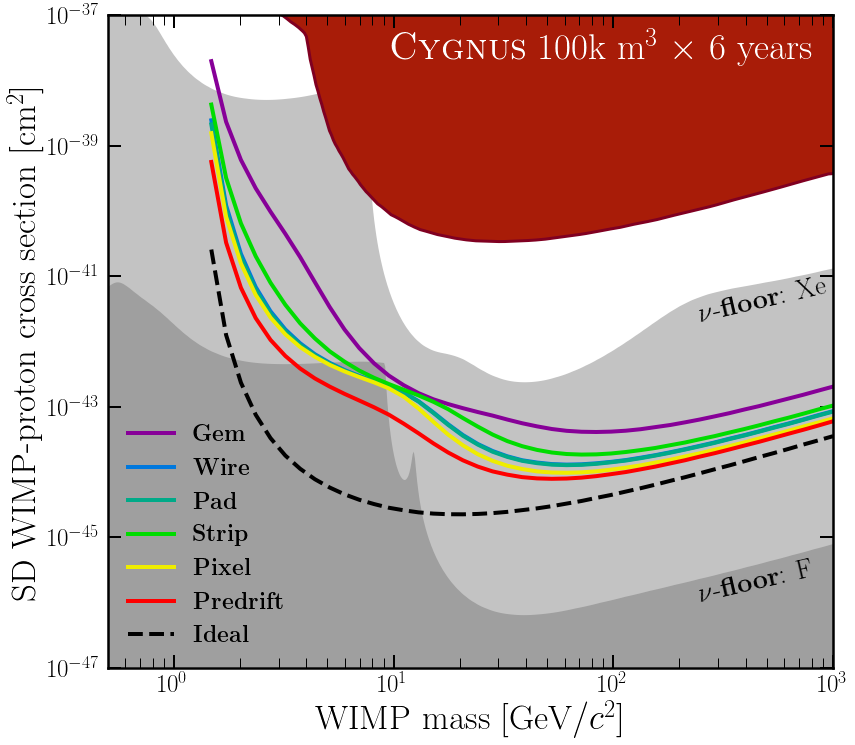

In [47]:
#### SD
fig,ax = MakeLimitPlot_SD(Collected=True,xmin=0.5,xmax=1.0e3,ymax=1.0e-37,ymin=1.0e-47)
plt.text(240.0,0.2e-41,r"$\nu$-{\bf floor}: Xe",fontsize=27,rotation=13,color="k")
plt.text(240.0,0.1e-45,r"$\nu$-{\bf floor}: F",fontsize=27,rotation=13,color="k")
for i in range(0,nro):
    plt.loglog(m_all[i,:],data_all_SD[i,:],lsty[i],color=col[i,:],linewidth=4,label=r"{\bf "+fname[i]+"}")
plt.legend(loc='lower left',fontsize=23,frameon=False)
plt.gcf().text(0.88,0.83,r"{\sc Cygnus} "+Vstr+r" m$^3$ $\times$ 6 years",fontsize=37,color='w',horizontalalignment='right')
plt.show()
fig.savefig('../plots/CYGNUS'+Vstr+'-readouts-SD.pdf',bbox_inches='tight')